## Iris Flower Classification

In [2]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
iris = pd.read_csv(r'D:\Python_files\weight_prediction\IRIS.csv')
iris.head()
iris.shape
iris.describe()
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


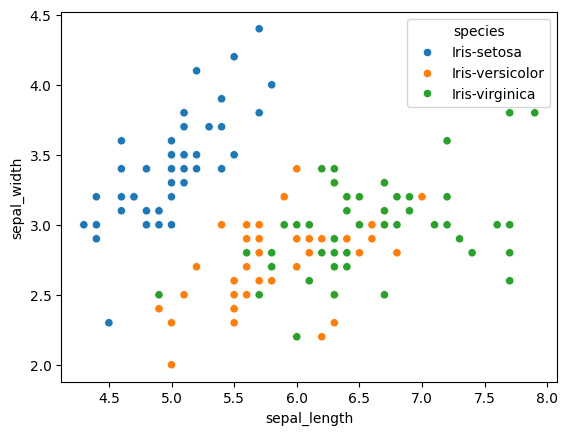

In [7]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

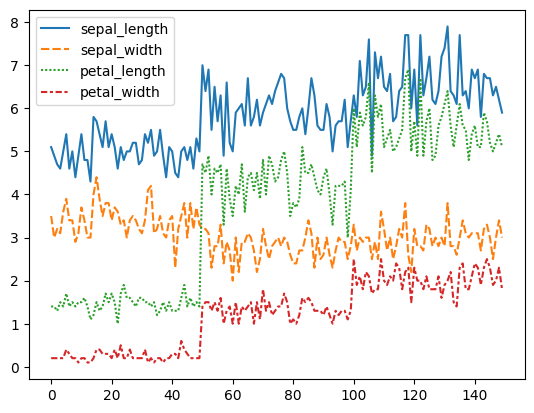

In [8]:
sns.lineplot(data=iris.drop(['species'], axis=1))
plt.show()

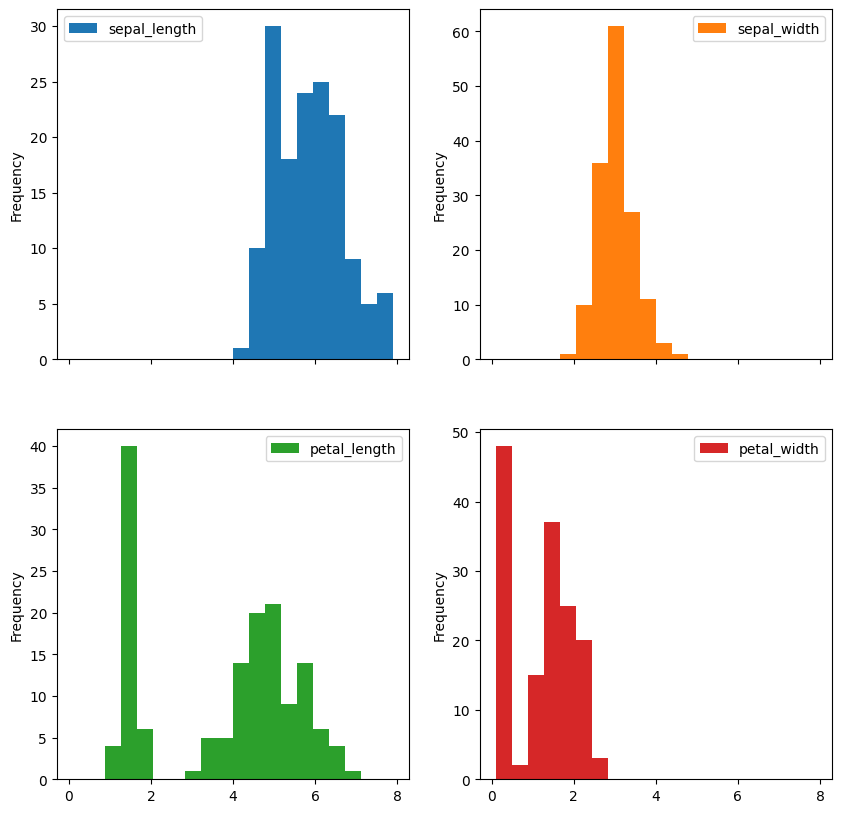

In [9]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
plt.show()

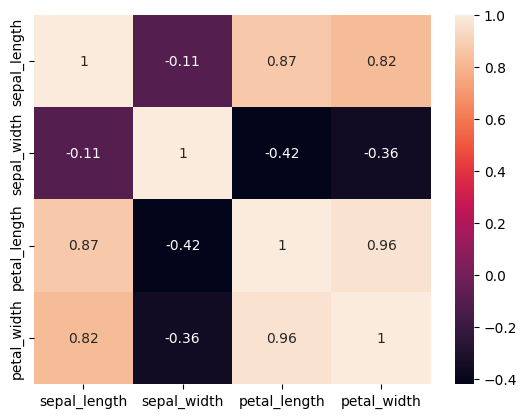

In [11]:
sns.heatmap(iris.drop(['species'], axis=1).corr(), annot=True)
plt.show()

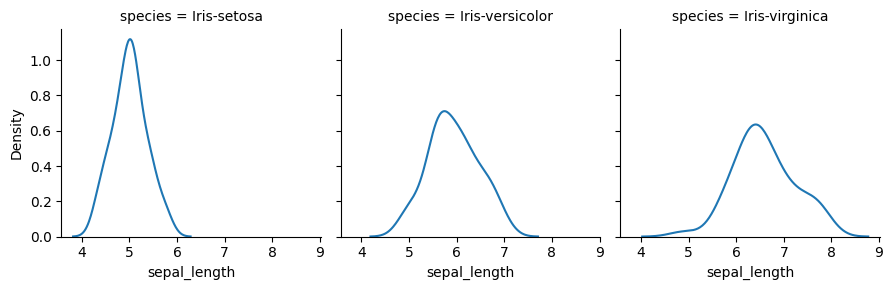

In [12]:
g = sns.FacetGrid(iris, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

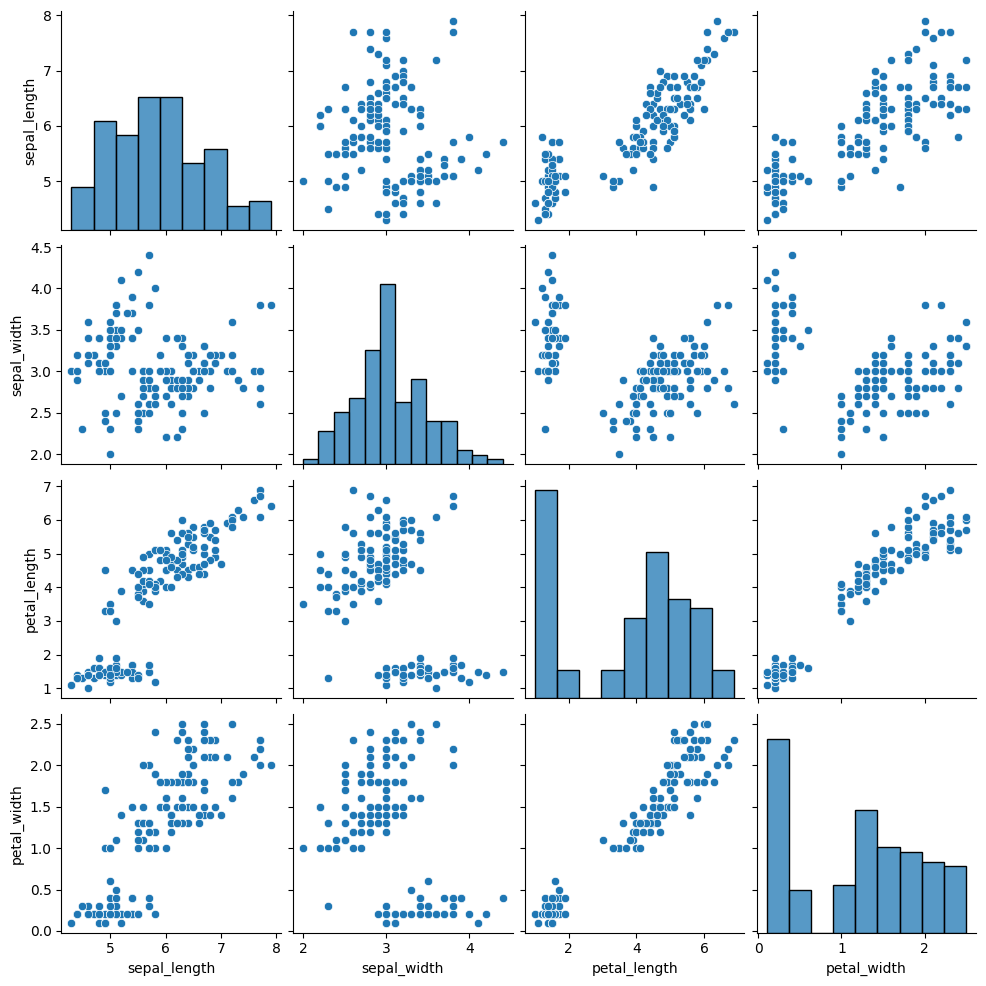

In [13]:
sns.pairplot(iris)

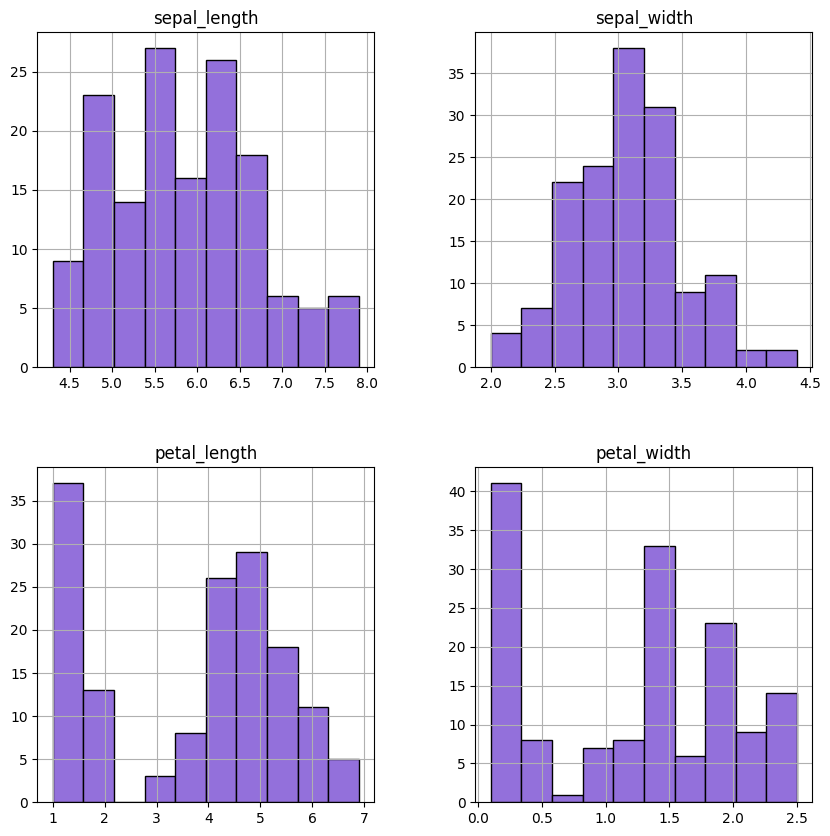

In [14]:
iris.hist(color= 'mediumpurple' ,edgecolor='black',figsize=(10,10))
plt.show()

In [17]:
iris.drop(['species'], axis=1).corr().style.background_gradient(cmap='coolwarm').format(precision=2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


### ML Models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [20]:
x = iris.drop('species', axis=1)
y= iris.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.9333333333333333

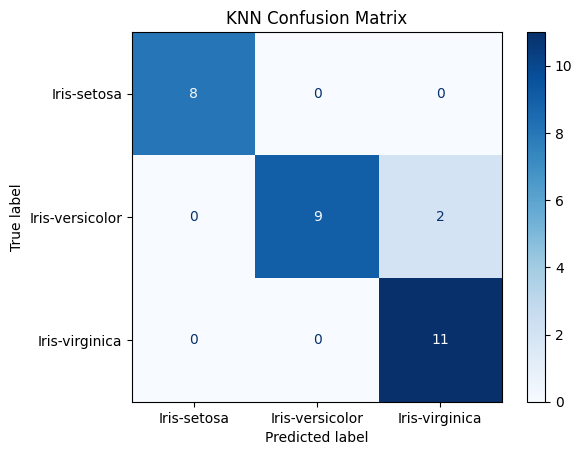

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn.classes_)
disp.plot(cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()

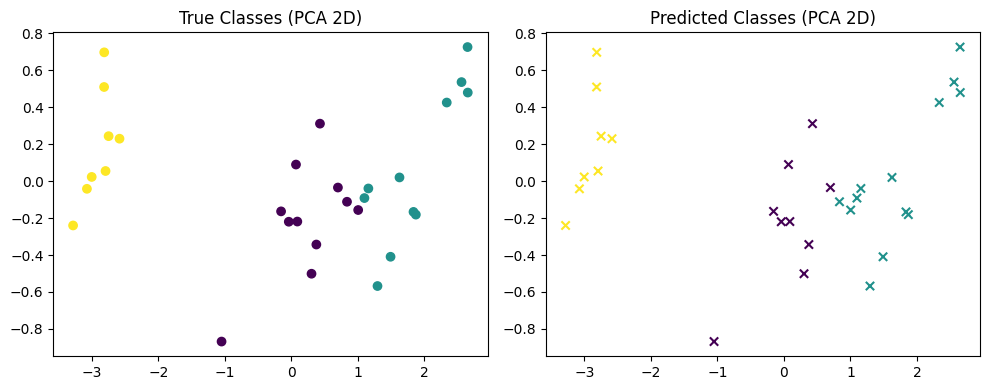

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_test)[0], cmap='viridis', label='True')
plt.title('True Classes (PCA 2D)')
plt.subplot(1,2,2)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_pred)[0], cmap='viridis', label='Predicted', marker='x')
plt.title('Predicted Classes (PCA 2D)')
plt.tight_layout()
plt.show()

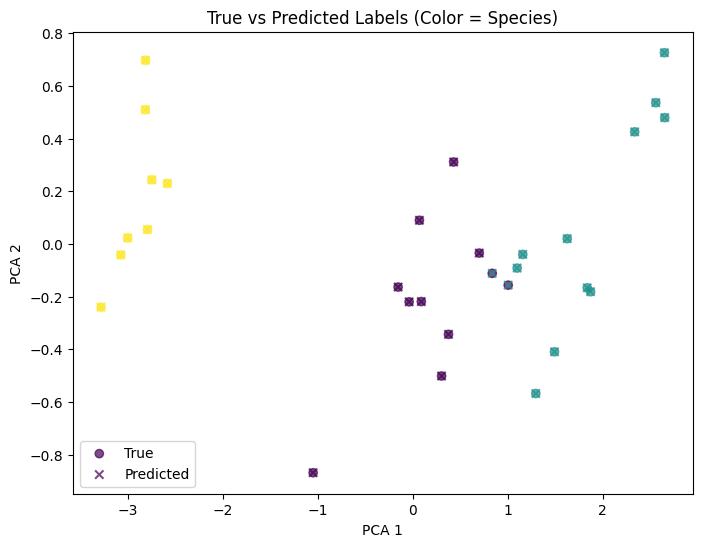

In [35]:
plt.figure(figsize=(8,6))

# True label: 圓點
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], 
            c=pd.factorize(y_test)[0], 
            cmap='viridis', marker='o', 
            label='True', alpha=0.7)

# Predict label: 叉叉
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], 
            c=pd.factorize(y_pred)[0], 
            cmap='viridis', marker='x', 
            label='Predicted', alpha=0.7)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.title('True vs Predicted Labels (Color = Species)')
plt.show()

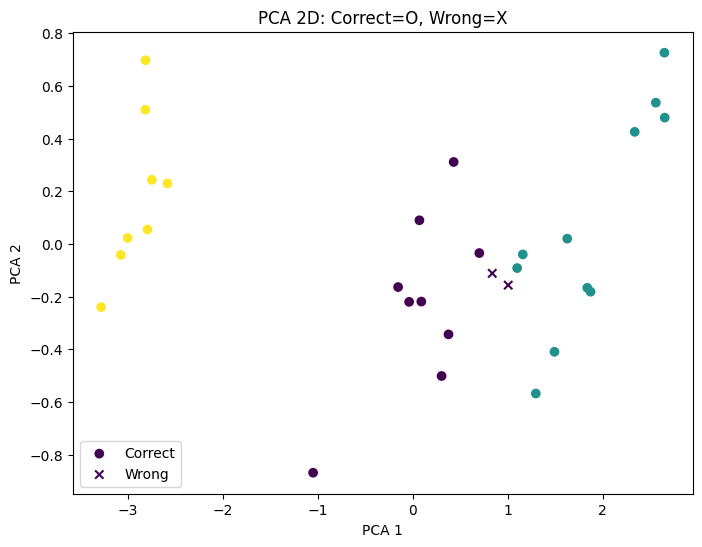

In [36]:
plt.figure(figsize=(8,6))
correct = (y_test == y_pred)
plt.scatter(x_test_pca[correct, 0], x_test_pca[correct, 1], c=pd.factorize(y_test[correct])[0], 
            cmap='viridis', marker='o', label='Correct')
plt.scatter(x_test_pca[~correct, 0], x_test_pca[~correct, 1], c=pd.factorize(y_test[~correct])[0],
            cmap='viridis', marker='x', label='Wrong', edgecolors='r')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 2D: Correct=O, Wrong=X')
plt.legend()
plt.show()

LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


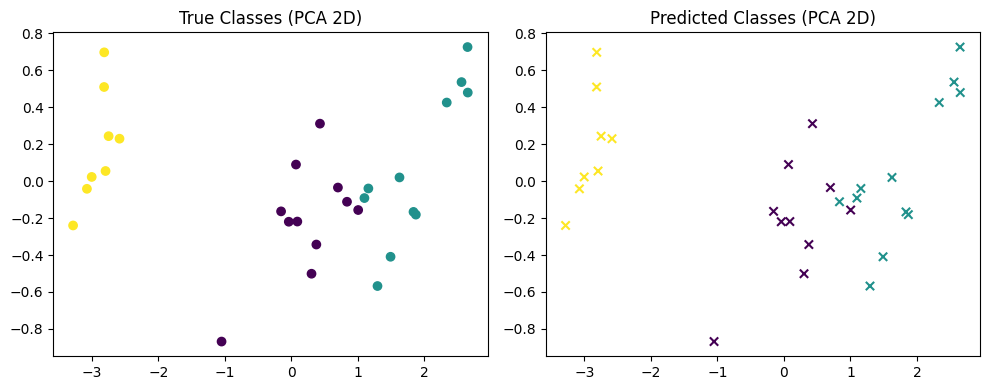

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_test)[0], cmap='viridis', label='True')
plt.title('True Classes (PCA 2D)')
plt.subplot(1,2,2)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_pred)[0], cmap='viridis', label='Predicted', marker='x')
plt.title('Predicted Classes (PCA 2D)')
plt.tight_layout()
plt.show()

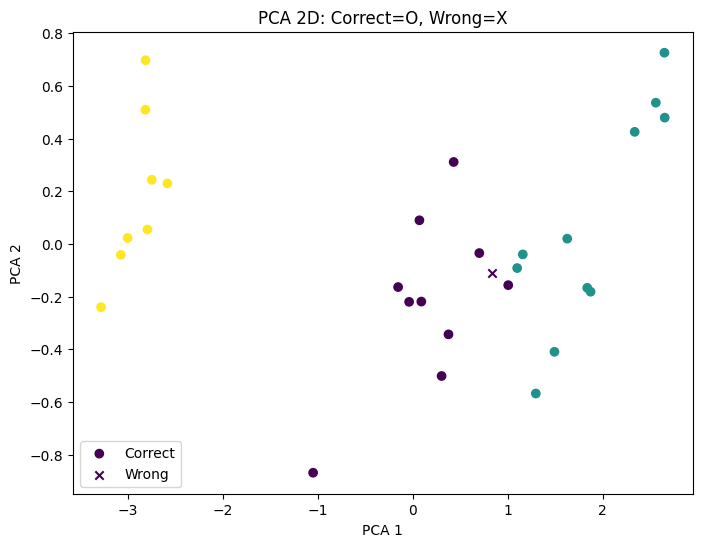

In [41]:
plt.figure(figsize=(8,6))
correct = (y_test == y_pred)
plt.scatter(x_test_pca[correct, 0], x_test_pca[correct, 1], c=pd.factorize(y_test[correct])[0], 
            cmap='viridis', marker='o', label='Correct')
plt.scatter(x_test_pca[~correct, 0], x_test_pca[~correct, 1], c=pd.factorize(y_test[~correct])[0],
            cmap='viridis', marker='x', label='Wrong', edgecolors='r')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 2D: Correct=O, Wrong=X')
plt.legend()
plt.show()

SVM

In [47]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

svm.score(x_test, y_test)

0.9666666666666667

In [48]:
y_pred = svm.predict(x_test)

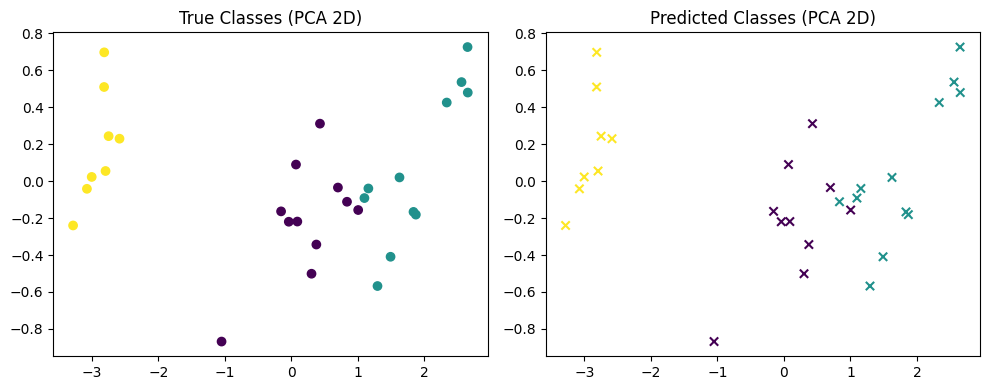

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_test)[0], cmap='viridis', label='True')
plt.title('True Classes (PCA 2D)')
plt.subplot(1,2,2)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_pred)[0], cmap='viridis', label='Predicted', marker='x')
plt.title('Predicted Classes (PCA 2D)')
plt.tight_layout()
plt.show()

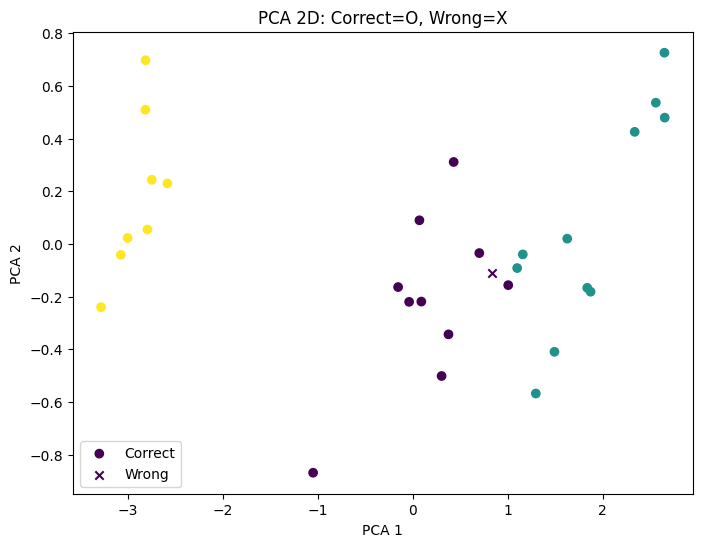

In [50]:
plt.figure(figsize=(8,6))
correct = (y_test == y_pred)
plt.scatter(x_test_pca[correct, 0], x_test_pca[correct, 1], c=pd.factorize(y_test[correct])[0], 
            cmap='viridis', marker='o', label='Correct')
plt.scatter(x_test_pca[~correct, 0], x_test_pca[~correct, 1], c=pd.factorize(y_test[~correct])[0],
            cmap='viridis', marker='x', label='Wrong', edgecolors='r')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 2D: Correct=O, Wrong=X')
plt.legend()
plt.show()

Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree.score(x_test, y_test)


0.9333333333333333

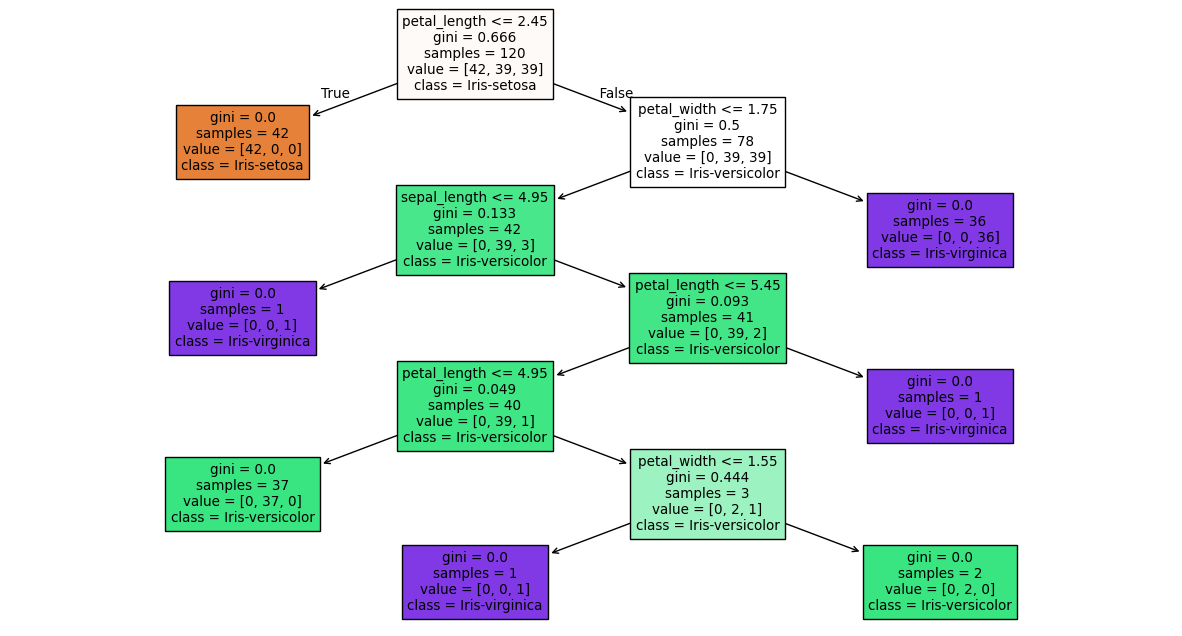

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(dtree, feature_names=x_train.columns, class_names=dtree.classes_, filled=True)
plt.show()

In [54]:
y_pred = dtree.predict(x_test)

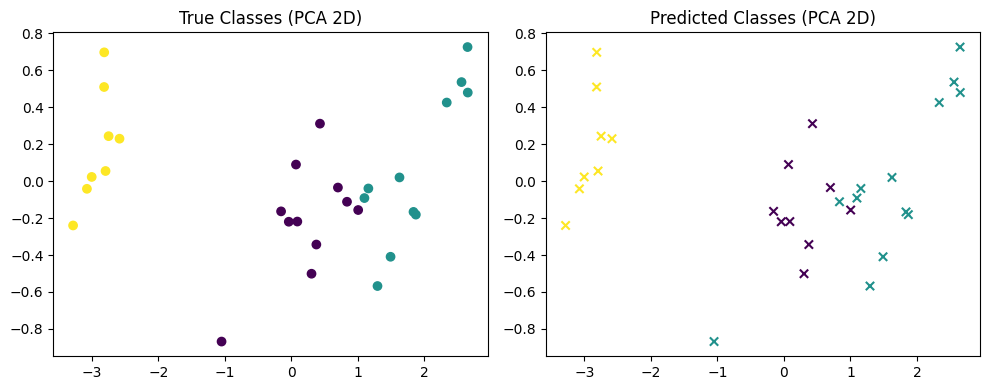

In [55]:
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_test)[0], cmap='viridis', label='True')
plt.title('True Classes (PCA 2D)')
plt.subplot(1,2,2)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_pred)[0], cmap='viridis', label='Predicted', marker='x')
plt.title('Predicted Classes (PCA 2D)')
plt.tight_layout()
plt.show()

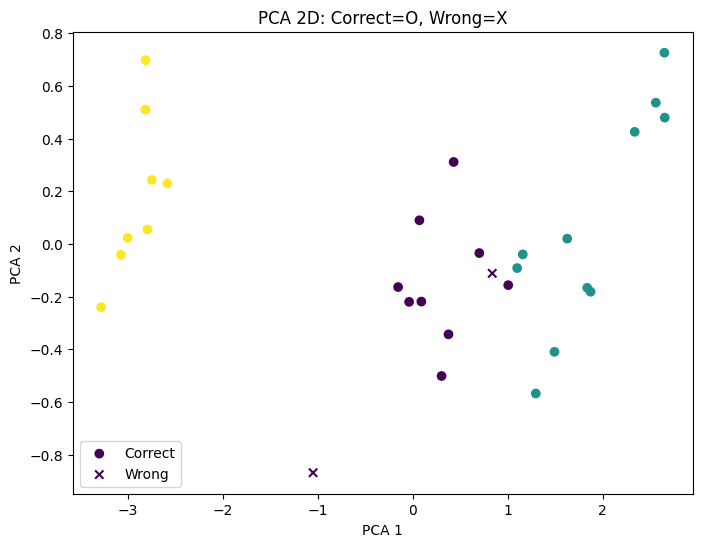

In [53]:
plt.figure(figsize=(8,6))
correct = (y_test == y_pred)
plt.scatter(x_test_pca[correct, 0], x_test_pca[correct, 1], c=pd.factorize(y_test[correct])[0], 
            cmap='viridis', marker='o', label='Correct')
plt.scatter(x_test_pca[~correct, 0], x_test_pca[~correct, 1], c=pd.factorize(y_test[~correct])[0],
            cmap='viridis', marker='x', label='Wrong', edgecolors='r')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 2D: Correct=O, Wrong=X')
plt.legend()
plt.show()

Custom model

In [61]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

model = tf.keras.Sequential([
      tf.keras.layers.Dense(32, activation = 'relu', input_shape = (4,)),
      tf.keras.layers.Dense(16, activation = 'relu'),
      tf.keras.layers.Dense(3, activation='softmax') # 3 classes
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train_cat, epochs = 100)

model.evaluate(x_test, y_test_cat)

Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 1.1103 - accuracy: 0.3250
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0678 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0326 - accuracy: 0.4000
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9940 - accuracy: 0.6333
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9564 - accuracy: 0.6750
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9226 - accuracy: 0.6750
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9007 - accuracy: 0.6750
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8763 - accuracy: 0.6583
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8527 - accuracy: 0.7500
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8295 - accuracy: 0.9083
Epoch 11/100
4/4 [===========

[0.15902480483055115, 0.9333333373069763]

1/1 [==============================] - 0s 17ms/step


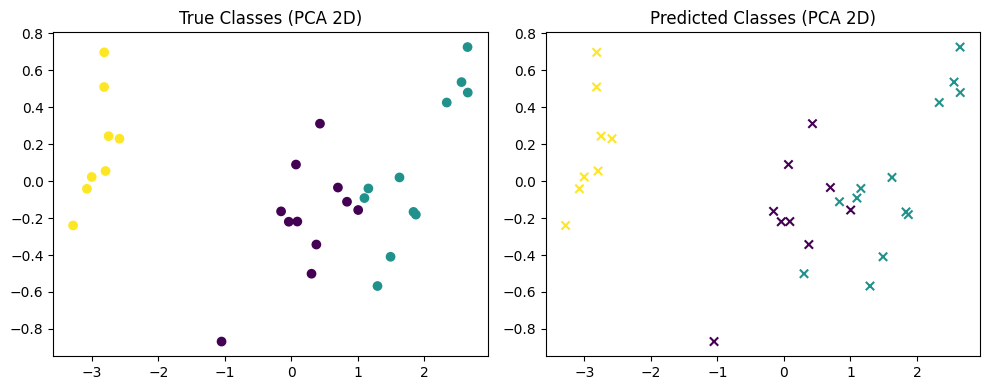

In [ ]:
y_pred = model.predict(x_test)
y_pred_label = y_pred.argmax(axis=1) 

pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_test)[0], cmap='viridis', label='True')
plt.title('True Classes (PCA 2D)')
plt.subplot(1,2,2)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=pd.factorize(y_pred_label)[0], cmap='viridis', label='Predicted', marker='x')
#plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred_label, cmap='viridis', label='Predicted', marker='x')
plt.title('Predicted Classes (PCA 2D)')
plt.tight_layout()
plt.show()

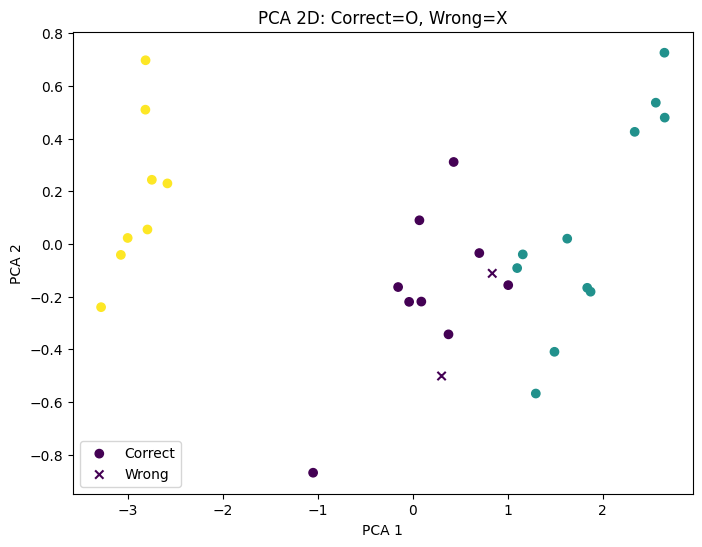

In [67]:
y_pred_str = le.inverse_transform(y_pred_label)

plt.figure(figsize=(8,6))
correct = (y_test == y_pred_str)
plt.scatter(x_test_pca[correct, 0], x_test_pca[correct, 1], c=pd.factorize(y_test[correct])[0], 
            cmap='viridis', marker='o', label='Correct')
plt.scatter(x_test_pca[~correct, 0], x_test_pca[~correct, 1], c=pd.factorize(y_test[~correct])[0],
            cmap='viridis', marker='x', label='Wrong', edgecolors='r')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 2D: Correct=O, Wrong=X')
plt.legend()
plt.show()